In [24]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import KFold
import numpy as np

In [25]:
size = 1000
cv = KFold(size, shuffle=True)

In [27]:
# create  xarray
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
X.shape

(1000, 1)

In [28]:
# scale=2 is the standard deviation of the distribution
np.random.normal(scale=2,size=size).shape

(1000,)

In [29]:
# create y array
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])
y.shape

(1000, 1)

In [30]:
def plot_curve():
    # instantiate
    lg = LinearRegression()

    # fit
    lg.fit(X, y)
    train_sizes, train_scores, test_scores = learning_curve(lg, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

No handles with labels found to put in legend.


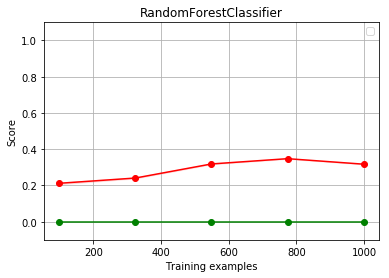

In [31]:
%matplotlib inline
plot_curve()